In [57]:
import csv
import matplotlib
import matplotlib.pyplot as plt

In [15]:
with open('feeding-america.csv', mode='r') as csv_file:
    recipe_reader = csv.reader(csv_file, delimiter=',')
    
    line_count = 0
    ingredients_set = set()
    for row in recipe_reader:
        if line_count == 0:
            column_names = row
            print(f'Column names are {", ".join(row)} \n')
            line_count += 1
        else:
           # print(f'This {row[2]} recipe is from the year {row[1]} and from the region {row[4]}. The ingredients are: {row[5]}. \n')
            ingredients = row[5]
            ingredients = ingredients.split(";")
            for ingredient in ingredients:
                
                ingredients_set.add(ingredient)
            line_count += 1
            
    print(ingredients_set)

Column names are book_id, date, ethnicgroup, recipe_class, region, ingredients 

{'white mayonnaise', 'rhine wine', 'cocoanut cake', 'noodle', 'white heart', 'cheshire cheese', 'hard cheese', 'bullock blood', 'salad sauce', 'hard sauce', 'sea bass', 'fruit sauce', 'white maidenhair', 'ginger extract', 'bergamot essence', 'pickle liquor', 'horseradish', 'paste crust', 'white beet', 'salt pork', 'ham fat', 'fruit tart', 'capillaire', 'wine jelly', 'green seed', 'vermicelli', 'currant cream', 'mustard butter', 'sheep brain', 'shallot', 'dried mushroom', 'jamaican rum', 'pate de foie gras', 'teal', 'pork skin', 'husk', 'sweetmeat', 'bake apple', 'short crust', 'prune sauce', 'roasted beef gravy', 'white gelatine', 'lamb rib', 'beef', 'applejack', 'pork gravy', 'white cherry', 'white grape', 'hog', 'sweet potato', 'penny roll', 'flavor', 'sweet biscuit', 'tart', 'asparagus', 'almond biscuit', 'roll cracker', 'spiced fruit', 'pickled beet', 'beef dripping', 'bread sauce', 'meat trimming', 'h

In [22]:
with open('feeding-america.csv', mode='r') as csv_file:
    recipe_reader = csv.reader(csv_file, delimiter=',')
    
    line_count = 0
    
    ingredient_introduction = dict()
    
    for row in recipe_reader:
        if(line_count != 0):
            
            year = row[1]
            ingredients = row[5]
            ingredients = ingredients.split(";")

            for ingredient in ingredients:
                # if the ingredient is already in the dictionary, check if current year is lower:
                if ingredient in ingredient_introduction.keys():
                    if(year < ingredient_introduction[ingredient]):
                        ingredient_introduction[ingredient] = year

                # if it is not in the dictionary yet, add it.
                else:
                    ingredient_introduction[ingredient] = year
                
        line_count += 1
        
    #print(ingredient_introduction)
    

In [25]:
year_dictionary = dict()

for ingredient in ingredient_introduction.keys():
    year = ingredient_introduction[ingredient]
    
    if year in year_dictionary.keys():
        year_dictionary[year].append(ingredient)
    else:
        year_dictionary[year] = [ingredient]
        

for year in year_dictionary.keys():
    print(year, ": ", year_dictionary[year], "\n")

1803 :  ['chicken', 'rice', 'salt', 'water', 'allspice', 'milk', 'breadcrumb', 'pepper', 'butter', 'egg', 'onion', 'parsley', 'fat', 'flour', 'garlic', 'steak', 'almond', 'lard', 'pork', 'raisin', 'cinnamon', 'sugar', 'mace', 'dripping', 'garlic clove', 'meat', 'potato', 'vinegar', 'beef', 'black pepper', 'lamb', 'fish', 'spice', 'yeast', 'egg yolk', 'bread', 'celery', 'green pea', 'lettuce', 'pumpkin', 'cream', 'egg white', 'spinach', 'meat gravy', 'bacon', 'dried mushroom', 'mushroom', 'oil', 'cherry', 'honey', 'pistachio nut', 'ham', 'sausage', 'broth', 'nutmeg', 'bayleaf', 'carrot', 'pea', 'lemon peel', 'paste', 'veal', 'bean', 'lemon juice', 'parmesan cheese', 'macaroon', 'custard', 'powdered sugar', 'lemon', 'seasoning', 'liver', 'kidney', 'raspberry', 'millet', 'horseradish', 'sorrel', 'brandy', 'bone', 'leek', 'chive', 'beef marrow', 'lemon rind', 'marjoram', 'asparagus', 'caper', 'rabbit', 'cabbage', 'cabbage leaf', 'walnut', 'parsnip', 'gravy', 'beet', 'rice water', 'fruit', 

In [28]:
import pandas as pd

In [37]:
recipe_df = pd.read_csv("feeding-america.csv", index_col="date")

In [43]:
recipe_df.head()

,book_id,ethnicgroup,recipe_class,region,ingredients
date,,,,,
1922,fofb.xml,mexican,soups,ethnic,chicken;green pepper;rice;salt;water
1922,fofb.xml,mexican,meatfishgame,ethnic,chicken;rice
1922,fofb.xml,mexican,soups,ethnic,allspice;milk
1922,fofb.xml,mexican,fruitvegbeans,ethnic,breadcrumb;cheese;green pepper;pepper;salt;sar...
1922,fofb.xml,mexican,eggscheesedairy,ethnic,butter;egg;green pepper;onion;parsley;pepper;s...


In [40]:
print(len(recipe_df))

48032


In [49]:
print(recipe_df["recipe_class"].value_counts())

breadsweets        14630
meatfishgame       11477
fruitvegbeans       7085
accompaniments      5495
eggscheesedairy     4150
soups               2631
beverages           2031
medhealth            533
Name: recipe_class, dtype: int64


<AxesSubplot:>

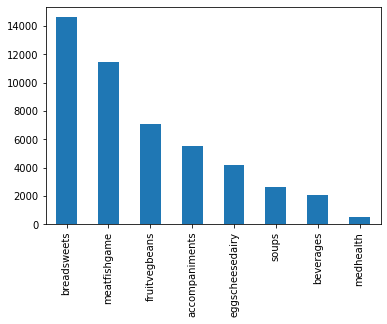

In [56]:
recipe_df["recipe_class"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='date'>

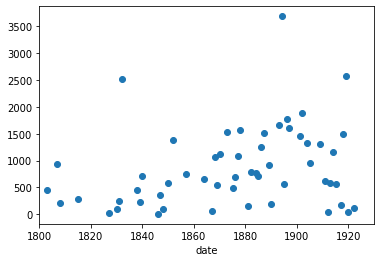

In [84]:
grouped_by_year = recipe_df.groupby('date')
recipe_counts_by_year = grouped_by_year.size()
recipe_counts_by_year.plot(style='o', xlim=(1800,1930))

In [85]:
ingredients = recipe_df['ingredients'].str.split(';')
groups_by_date = ingredients.groupby('date')
ingredients = groups_by_date.sum()
ingredients = ingredients.apply(pd.Series.value_counts)
ingredients = ingredients.divide(recipe_counts,0)

Text(0, 0.5, 'Fraction of recipes in which potato occurs as an ingredient.')

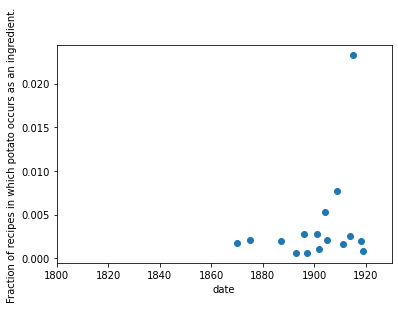

In [86]:
fig = ingredients['maple syrup'].plot(style='o', xlim=(1800, 1930))
fig.set_ylabel("Fraction of recipes in which potato occurs as an ingredient.")